# Capstone Project - Predicting The Risk Of Customer Churn 

## Feature Engineering2 And Modeling
***

### Author - Oyeronke Ayansola

### Date - 12/12/2022

### <font color=red> Notebook #4</font>
***

## Table of Contents
### [Model Goal](##ModelGoal)
### [Import Libraries And Data](##ImportLibrariesAndData)
### [Explore Dataframe](##ExploreAndMergeDataframe)
### [Categorical to Numerical Variables](##CategoricaltoNumericalVariables)
### [Train-Test Split](##Train-TestSplit)
   * [Test, Train and Validation Data Split](##Test_TrainandValidationDataSplit)
### [Models on Train and Validation Sets](##ModelsonTrainandValidationSets)
   * [1.Logistic Regression](##1_LogisticRegression)
   * [2.Decision Tree Classifier (DT)](##2_DecisionTreeClassifier(DT))
   * [3.K-Neighbors Classifier (KNN)](##3_K-NeighborsClassifier(KNN))
   * [Ensemble Models](##EnsembleModels)
   * [Random Forest Classifier](##RandomForestClassifier)
   * [XGBoost Model](##XGBoost)
   * [Downsampling](##Downsampling)
   * [Upsampling](##Upsampling)   
   * [Hyperparameters with Grid Search](###HyperparameterswithGridSearch)
### [Final Model - Scoring on Test Set](##FinalModel-ScoringonTestSet)
### [Conclusion](##Conclusion)
***

### Model Goal

In this notebook, the goal is to identify the best model that we classify churn customers as much possible, without misclassifying too many non-churn using confusion matrix with a good f1-score.

The best model will be identified using validation sets (a sub-set of our data) afterwards, the choosen model will be tested on a set-aside test dataset.
***

### Import Libraries

We need to import the packages require to run the models successfully.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# converting to datetime if neccessary
from datetime import datetime

# import converting categorical variables to numeric
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

# importing train test split from sklearn package to sub-set our data
from sklearn.model_selection import train_test_split

# import for parameters optimisation 
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import GridSearchCV

# To try dimensionality reduction
from sklearn.decomposition import PCA


# import models from sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression


# import for model evaluation 
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score



#Some of these packages will generate a ton of warnings...
import warnings
warnings.filterwarnings("ignore")


Next we will import the data a `csv` file, from `Notebook #2`

In [2]:
# import the data
df = pd.read_csv('df2_engineered.csv')

### Explore Data

In [3]:
# see the first few rows
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,payment_sequential,...,shipping_limit_month,review_creation_month,review_answer_month,order_purchase_day,order_delivered_carrier_day,order_delivered_customer_day,order_estimated_delivery_day,shipping_limit_day,review_creation_day,review_answer_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,1.0,...,5,5,5,16,23,25,5,22,26,30
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,1.0,...,6,6,6,15,18,21,5,19,22,26
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,1.0,...,9,9,9,9,11,18,2,14,19,20
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,1.0,...,3,3,11,26,27,28,12,30,29,4
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,1.0,...,2,4,4,29,31,3,9,8,8,8


In [4]:
# see the shape of the data
df.shape

(96035, 68)

Our dataframe has `96,035` rows and `68` columns.

In [5]:
# see the datatypes
df.dtypes

customer_id                     object
customer_unique_id              object
customer_zip_code_prefix         int64
customer_city                   object
customer_state                  object
                                 ...  
order_delivered_customer_day     int64
order_estimated_delivery_day     int64
shipping_limit_day               int64
review_creation_day              int64
review_answer_day                int64
Length: 68, dtype: object

We will need to check for any duplication or null values because these will impact our model building negatively - models building requires non-null data.

In [6]:
# check for duplication
df.duplicated().sum()

0

In [7]:
# check for null values
df.isnull().any().sum()

0

There is no duplication or null values in our dataframe. Next, we will inspect our data for datatypes and examine the categorical variables. This is because we need to have all variables represented as numeric. 

In [8]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96035 entries, 0 to 96034
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     96035 non-null  object 
 1   customer_unique_id              96035 non-null  object 
 2   customer_zip_code_prefix        96035 non-null  int64  
 3   customer_city                   96035 non-null  object 
 4   customer_state                  96035 non-null  object 
 5   customer_latitude               96035 non-null  float64
 6   customer_longitude              96035 non-null  float64
 7   order_id                        96035 non-null  object 
 8   order_status                    96035 non-null  object 
 9   payment_sequential              96035 non-null  float64
 10  payment_type                    96035 non-null  object 
 11  payment_installments            96035 non-null  float64
 12  payment_value                   

We have some categorical variables. Let us see what these are and decide which ones are worth keeping for modeling.

In [9]:
# save the categorical columns in one dataframe
non_numeric_df = df.select_dtypes(['object'])
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96035 entries, 0 to 96034
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    96035 non-null  object
 1   customer_unique_id             96035 non-null  object
 2   customer_city                  96035 non-null  object
 3   customer_state                 96035 non-null  object
 4   order_id                       96035 non-null  object
 5   order_status                   96035 non-null  object
 6   payment_type                   96035 non-null  object
 7   product_id                     96035 non-null  object
 8   seller_id                      96035 non-null  object
 9   review_id                      96035 non-null  object
 10  product_category_name          96035 non-null  object
 11  product_category_name_english  96035 non-null  object
 12  seller_city                    96035 non-null  object
 13  s

In [10]:
# check the shape
non_numeric_df.shape

(96035, 14)

We have 14 categorical columns some of which are `IDs` that we will need to drop. But first let us check the unique values of the rest of the columns.

In [11]:
print(f"payment_type_value: {df['payment_type'].nunique()}")
print(f"product_category_name_english-value: {df['product_category_name_english'].nunique()}")
print(f"customer_city_values: {df['customer_city'].nunique()}")
print(f"seller_city_values: {df['seller_city'].nunique()}")
print(f"customer_state_values: {df['customer_state'].nunique()}")
print(f"seller_state_values: {df['seller_state'].nunique()}")

payment_type_value: 4
product_category_name_english-value: 71
customer_city_values: 4044
seller_city_values: 604
customer_state_values: 27
seller_state_values: 23


We have columns for both cities and states, we need only one of them. Because states are values are not as much as cities, to make it easier in-terms of computation expense, we will delete `cities` and keep states. Likewise, we will drop all `IDs` columns. Also, we have the product category already represented in english, we will remove the other `product_category_name` and keep the english translated version.

In [12]:
# drop the id columns plus cities columns
df.drop(['customer_id', 'customer_unique_id', 'review_id', 'seller_id',
                        'product_id', 'order_id', 'seller_city','customer_city','product_category_name', 
         'order_item_id'], axis=1, inplace = True)

In [13]:
# sanity check
df.shape

(96035, 58)

We have a reduced dataframe now. let us check the info again.

In [14]:
#see info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96035 entries, 0 to 96034
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_zip_code_prefix        96035 non-null  int64  
 1   customer_state                  96035 non-null  object 
 2   customer_latitude               96035 non-null  float64
 3   customer_longitude              96035 non-null  float64
 4   order_status                    96035 non-null  object 
 5   payment_sequential              96035 non-null  float64
 6   payment_type                    96035 non-null  object 
 7   payment_installments            96035 non-null  float64
 8   payment_value                   96035 non-null  float64
 9   price                           96035 non-null  float64
 10  freight_value                   96035 non-null  float64
 11  review_score                    96035 non-null  float64
 12  product_name_length             

**Recency** was used in defining the **churn** category. For proper model 'learning' we will need to delete recency to avoid overfitting of our model.

In [15]:
# drop Recency column
df.drop(['recency'], axis=1, inplace = True)

In [16]:
# sanity check
df.shape

(96035, 57)

### Categorical to Numerical Variables

For modeling as stated earlier, we will convert the non-neric variables to numeric. Since we have dropped some, we will go ahead and have a look at the the remianing and convert them to numeric.

In [19]:
# check the 'object' data types
non_numeric_df2 = df.select_dtypes(['object'])
non_numeric_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96035 entries, 0 to 96034
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_state                 96035 non-null  object
 1   order_status                   96035 non-null  object
 2   payment_type                   96035 non-null  object
 3   product_category_name_english  96035 non-null  object
 4   seller_state                   96035 non-null  object
dtypes: object(5)
memory usage: 3.7+ MB


There are 5 columns that are categorical, we will need to convert them to numeric columns. These are:

1. **customer_state**
2. **order_status**
3. **payment_type**
4. **product_category_name_english**
5. **seller_state**

We will transform the above columns using `OneHotEncoder`. 

In [20]:
# Put the columns to be converted in a list with the method to be used
column_transform_list = [
                         ('payment_type', OneHotEncoder(), ['payment_type']),
                         ('product_category_name_english', OneHotEncoder(), ['product_category_name_english']),
                         ('customer_state', OneHotEncoder(), ['customer_state']),
                         ('order_status', OneHotEncoder(), ['order_status']),
                         ('seller_state', OneHotEncoder(), ['seller_state'])
]

# Creating the column transformer
column_transformer = ColumnTransformer(column_transform_list)

# Fit it on the original dataset
column_transformer.fit(df)


ColumnTransformer(transformers=[('payment_type', OneHotEncoder(),
                                 ['payment_type']),
                                ('product_category_name_english',
                                 OneHotEncoder(),
                                 ['product_category_name_english']),
                                ('customer_state', OneHotEncoder(),
                                 ['customer_state']),
                                ('order_status', OneHotEncoder(),
                                 ['order_status']),
                                ('seller_state', OneHotEncoder(),
                                 ['seller_state'])])

In [21]:
# Get column names with the column titles as a prefix
column_transformer.get_feature_names()

['payment_type__x0_boleto',
 'payment_type__x0_credit_card',
 'payment_type__x0_debit_card',
 'payment_type__x0_voucher',
 'product_category_name_english__x0_agro_industry_and_commerce',
 'product_category_name_english__x0_air_conditioning',
 'product_category_name_english__x0_art',
 'product_category_name_english__x0_arts_and_craftmanship',
 'product_category_name_english__x0_audio',
 'product_category_name_english__x0_auto',
 'product_category_name_english__x0_baby',
 'product_category_name_english__x0_bed_bath_table',
 'product_category_name_english__x0_books_general_interest',
 'product_category_name_english__x0_books_imported',
 'product_category_name_english__x0_books_technical',
 'product_category_name_english__x0_cds_dvds_musicals',
 'product_category_name_english__x0_christmas_supplies',
 'product_category_name_english__x0_cine_photo',
 'product_category_name_english__x0_computers',
 'product_category_name_english__x0_computers_accessories',
 'product_category_name_english__x0

In [22]:
# Transform the original dataset

transformed_col = column_transformer.transform(df)

# Sanity check 
transformed_col


<96035x132 sparse matrix of type '<class 'numpy.float64'>'
	with 480175 stored elements in Compressed Sparse Row format>

We have succeeded in converting to a sparse matrix of numeric datatype with `132` columns. 

In [23]:
# put the transformed matrix to a dataframe

transformed_df = pd.DataFrame(transformed_col.toarray(),
                              columns=column_transformer.get_feature_names(),
                              index=df.index)

# sanity check
transformed_df.head()

,payment_type__x0_boleto,payment_type__x0_credit_card,payment_type__x0_debit_card,payment_type__x0_voucher,product_category_name_english__x0_agro_industry_and_commerce,product_category_name_english__x0_air_conditioning,product_category_name_english__x0_art,product_category_name_english__x0_arts_and_craftmanship,product_category_name_english__x0_audio,product_category_name_english__x0_auto,...,seller_state__x0_PE,seller_state__x0_PI,seller_state__x0_PR,seller_state__x0_RJ,seller_state__x0_RN,seller_state__x0_RO,seller_state__x0_RS,seller_state__x0_SC,seller_state__x0_SE,seller_state__x0_SP
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We will now concatenate the transformed dataframe with our original dataframe and drop the columns we made the sparse matrix form.

In [24]:
# Concatenate the transformed_df and our original dataframe 

df = pd.concat([df, transformed_df], axis=1)

In [25]:
# Drop the former columns
df.drop(['payment_type', 'product_category_name_english', 
         'customer_state','order_status', 'seller_state'], axis=1, inplace=True)

# Sanity check
df.head()

,customer_zip_code_prefix,customer_latitude,customer_longitude,payment_sequential,payment_installments,payment_value,price,freight_value,review_score,product_name_length,...,seller_state__x0_PE,seller_state__x0_PI,seller_state__x0_PR,seller_state__x0_RJ,seller_state__x0_RN,seller_state__x0_RO,seller_state__x0_RS,seller_state__x0_SC,seller_state__x0_SE,seller_state__x0_SP
0,14409,-20.509898,-47.397866,1.0,2.0,146.87,124.99,21.88,4.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14409,-20.509898,-47.397866,1.0,8.0,94.77,79.90,14.87,5.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14409,-20.509898,-47.397866,1.0,1.0,62.50,44.90,17.60,5.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,14409,-20.509898,-47.397866,1.0,3.0,32.69,19.90,12.79,5.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14409,-20.509898,-47.397866,1.0,1.0,77.01,63.90,13.11,5.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# check the shape
df.shape

(96035, 184)

We ended up with `184` columns after transformation.

### Train-Test Split

In our dataframe, we have dependent and independent features. It is neccessary to separate these two into different dataframes. Our traget variable - the dependent feature which is the `churn` column will be represented as `y` while the others - the independent features will be represented as `X`.

In [27]:
# Assign dependent and independent variables
X = df.drop('churn', axis = 1)
y = df['churn']

In [28]:
# let's see the shape
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (96035, 183)
y shape: (96035,)


#### Test, Train and Validation Data  Split

In order to guard against overfitting, we will split our data into 3 classes, **Train**, **Test**, and **validation**. 

We will fit the models to train set, use validation set to tune a model's hyperparameters and use as a somewhat unbiased estimate of the model's performance. We except our model not to overfit to this data since we will not fit our model to validation set. But when we adjust the hyperparametrs, we may still be overfiting to it in someway. 

The test set will be a total unbiased estimate of the model's performance since the model has never seen it before. We will set the test set aside while we check the performance of our models on the validation set first. 

In [29]:
# spliting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 67, stratify = y)

# Checking the shape of our train and test sets
print(f'The X_train set has {X_train.shape} shape.')
print(f'The X_test set has {X_test.shape} shape.')
print(f'The y_train set has {y_train.shape} shape.')
print(f'The y_test set has {y_test.shape} shape.')

The X_train set has (76828, 183) shape.
The X_test set has (19207, 183) shape.
The y_train set has (76828,) shape.
The y_test set has (19207,) shape.


In [30]:
# Split the train set into train (X2 and y2) and validation sets
X2_train, X_val, y2_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=1, stratify = y_train)

# Print split info 
print(f'The train set has {len(X2_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 53779 data points.
The validation set has 23049 data points.


We now have our final proportion to be:
- Test set: 0.2
- Training set: 0.8 of 0.7 = 56%
- Validation set: 0.8 of 0.3 = 24% 
    
The data shape originally was 96,035 data points. We now have:

* Test Set: 0.2 * 96035 $\approx$ 19207
* Validation Set: 0.24 * 96035 $\approx$ 23049
* Training Set: 0.56 * 96035 $\approx$ 53779

We need to make sure the `statify` function works well and the sets proportion have been preserved in every `y` set.

In [31]:
# check that the class proportions have been preserved in all sets.
print('Proportions in original data:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in remainder set:')
print(y2_train.value_counts()/len(y2_train), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in validation set:')
print(y_val.value_counts()/len(y_val), '\n')

Proportions in original data:
1    0.772713
0    0.227287
Name: churn, dtype: float64 

Proportions in remainder set:
1    0.772718
0    0.227282
Name: churn, dtype: float64 

Proportions in test set:
1    0.772739
0    0.227261
Name: churn, dtype: float64 

Proportions in validation set:
1    0.772702
0    0.227298
Name: churn, dtype: float64 



The proportions appears to be have been preserved. We have imbalance in our `target-y` variable, we will try and balance the class later but for now, we will use it as it is.

### Models on Train and Validation Sets

In the first set of modeling, we will utilise only the **validation** set for model accuracy and evaluation and keep our **test** set for later.

Prior to fitting model, we need to scale first. We do not want our model to assume a distribution for our data, therefore, we will use MinMax scaler because we need to keep the original distribution in place.

The evaluation metrics that will be used to evaluate the performance of the models is the recall score, f1-score and the AUC score.

In AUC our model is more confident that the positive point belongs to the positive class than the negative point belonging to the positive class.

In [32]:
# Set scale for the data
# instantiate scaler
scaler = MinMaxScaler()

X2_train_ss = scaler.fit_transform(X2_train)
X_val_ss = scaler.transform(X_val)

### 1. Logistic Regression

We will fit the data using logistic regression, that is the validation and train set. Next, we will check the accuracies on both validation and train sets and evaluate the model's performance, without adjusting the default parameters but setting random state to `234` - this may be any value, acting as seed for reproducibility.

In [33]:
# Logistic Regression model
# instantiate the model and fit it on the scaled data
LR_model = LogisticRegression(random_state=234).fit(X2_train_ss, y2_train)

# print out the train and validation accuracy scores
print(f"Train accuracy: {LR_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {LR_model.score(X_val_ss, y_val)}")

Train accuracy: 0.9913720969151527
Validation accuracy: 0.9910625189813007


The accuracies on our train and validation sets seems very good. Because we have an imbalance class data, accuracy is not the best metrics for our model performance, this can lead us to a false sense of confidence.

We will look at classification report, evaluting the performance for f-1 score, precision and recall. 

In [34]:
# get the classification report
y_pred = LR_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5239
           1       1.00      0.99      0.99     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049



Our model is a really good. The model is 97% precise in predicting customer churn, and able to recall 99% churn, with a f1 score of 98%. 

Let us properly view this in a confusion matrix, to see how many true positive and true negative churn number the model will predict and how accurate our predictions will be.

In [35]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5170,69
True Non-churn,137,17673


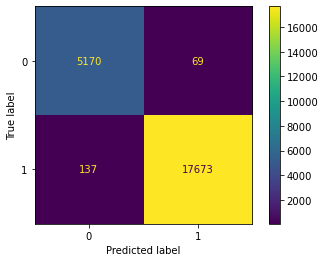

In [36]:
# plot confusion matrix
plot_confusion_matrix(LR_model, X_val_ss, y_val);

We have a total of 5239 for **Churn** and the model was able to accurately predict 5170 (98%). The model missed 69 churned customers, and predicted those as Non-churn.

Also, our model was able to predict 17,673 as Non-churn out of 17,810 (99%) and misclassified 137 as being churn. This a very good model overall. 

Next, we will check AUC score.

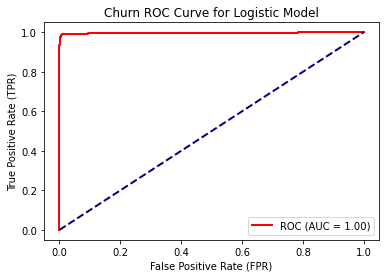

In [37]:
# predicting probabilities of data points being in the positive class  
y_val_proba = LR_model.predict_proba(X_val_ss)[:,1] 

# create ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for Logistic Model')
plt.legend(loc='best')
plt.show()

The ROC for our logistic regression model has a very good AUC score `100%`. This implies that the model was able to distinguish between the positive and negative classes perfectly.

### 2. Decision Tree Classifier (DT)

Next, we will check the train and validation set on DT model and evaluate the model as described above.


In [38]:
# instantiate and fit the model on the train set
DT_model = DecisionTreeClassifier(random_state=234).fit(X2_train, y2_train)

# score the train and validation set
print(f"Train accuracy: {DT_model.score(X2_train, y2_train)}")
print(f"Validation accuracy: {DT_model.score(X_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.991583148943555


The train and validation accuracies are very good here too but as same above, we have an imbalance class hence we will need to proceed to more evaluation. 

In [39]:
# get the classification report
y_pred = DT_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5239
           1       0.99      0.99      0.99     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049



In [40]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5144,95
True Non-churn,99,17711


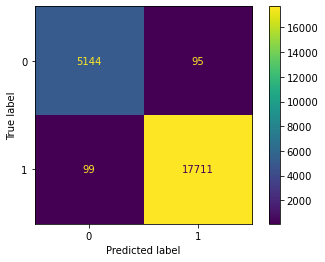

In [41]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_model, X_val, y_val);

Here, from a total of 5239 for **Churn** and the model was able to accurately predict 5129 (97%). The model missed 110 churned customers, and predicted those as Non-churn.

Also, our model was able to predict 17,711 as Non-churn out of 17,810 (99%) and misclassified 99 as being churn. This a very good model overall. 

Next, we will check AUC score.

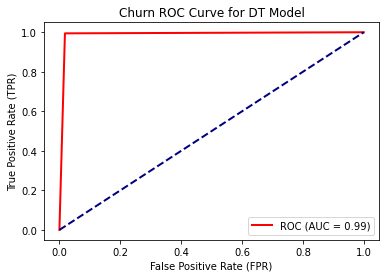

In [42]:
# predicting probabilities of data points being in the positive class  
y_val_proba = DT_model.predict_proba(X_val)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for DT Model')
plt.legend(loc='best')
plt.show()

The ROC for our DT model is at `99%`, a very good AUC score.

### 3. K-Neighbors Classifier (KNN)

We will check the train and validation set on KNN model and evaluate the model.


In [43]:

from sklearn.neighbors import KNeighborsClassifier

# instantiate the KNN model and fit it on the scaled data

KNN_model = KNeighborsClassifier().fit(X2_train_ss, y2_train)


# print out the train and validation scores
print(f"Number of Neighbors: {KNN_model.n_neighbors}")
print(f"Train accuracy: {KNN_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {KNN_model.score(X_val_ss, y_val)}")

Number of Neighbors: 5
Train accuracy: 0.9674780118633668
Validation accuracy: 0.9451169248123563


At K `number of neighbors = 5`, we have train accuracy score at 96% and validation at 94%. Again, accuracy does not properly describe our model evalution.

In [44]:
# classification report
y_pred = KNN_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5239
           1       0.96      0.97      0.96     17810

    accuracy                           0.95     23049
   macro avg       0.92      0.92      0.92     23049
weighted avg       0.94      0.95      0.94     23049



In [45]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4555,684
True Non-churn,581,17229


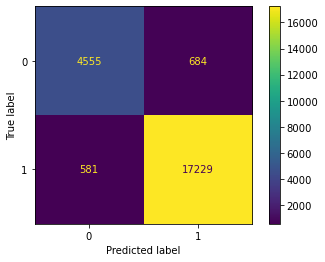

In [46]:
# plot confusion metric
plot_confusion_matrix(KNN_model, X_val_ss, y_val);

Out of 5239 for **Churn** and the model was able to accurately predict 4555 (86%). The model missed 684 churned customers, and predicted those as Non-churn. 

Our model was able to predict 17,229 as Non-churn out of 17,810 (96%) and misclassified 581 as being churn. 

KNN result has the lowest predicted class and f1-score so far.

Let us check AUC score.

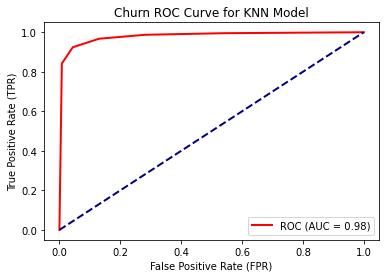

In [91]:
# predicting probabilities of data points being in the positive class  
y_val_proba = KNN_model.predict_proba(X_val_ss)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)
                        
# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for KNN Model')
plt.legend(loc='best')
plt.show()

The ROC for our KNN model is at `98%` AUC score.

We have results for our traditional models: Logistic Regression, DT and KNN. Let all have a look at the summary of our results.


Model | True Churn | False Churn| Precision |    Recall       |f1-score
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 5170 (98%)| 69 (2%)|97% | 99% | 98%
Decision Tree | 5144 (97%) | 95 (3%) |98% | 98% | 98%
KNN | 4555 (86%) | 684 (14%) |89% | 87% | 88%

We have good models! The best model so far are both Logistic and DT with f1-score of 98%. Logistic seems better that DT because it was able to classify True churn better than DT.

### Ensemble Models

So far, we have a good model, but it is possible to make our model even better. Let us try ensemble models. 

An ensemble model is a collection of many machine learning models, which are used to gain more predictive power. We will try **Random Forest** and **eXtreme Gradient Boosting (XGBoost)**.

### Random Forest Classifier

A random forest is an ensemble of decision trees. It is a subset of the bigger ensemble type called bagging. We will fit our model on the train set as always and score on validation set.

In [48]:
# import the classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the model and fit the model to the scaled data
RF_model = RandomForestClassifier(random_state=234).fit(X2_train_ss, y2_train)


# print the train and validation scores
print(f"Number of Trees in the Forest: {RF_model.n_estimators}")
print(f"Train accuracy: {RF_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {RF_model.score(X_val_ss, y_val)}")


Number of Trees in the Forest: 100
Train accuracy: 1.0
Validation accuracy: 0.9931016530001302


As always, although accuracy is very good but we can not rely on it due to data imbalance.

In [49]:
y_pred = RF_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049



Seems our model selection is improving! We have a recall of 100% for RF.

In [50]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)


1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5218,21
True Non-churn,138,17672


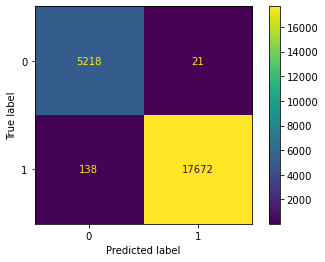

In [51]:
# plot confusion matrix
plot_confusion_matrix(RF_model, X_val_ss, y_val);


RF model was able to accurately predict 5218 (99%)! There was a small number of chrun that we incorrectly classified as not-churn, 21 ( true churn were misclassified as not churn. 

The vast majority of data points are from class 1 (not-churn) and were correctly predicted, 17672 (99%) were predicted correctly as not-churn by the model out of 17810.

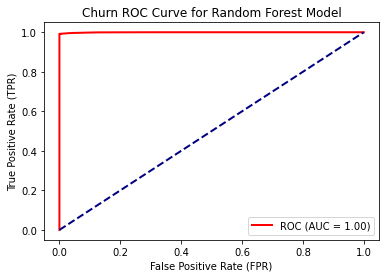

In [52]:
# predicting probabilities of data points being in the positive class
y_val_proba = RF_model.predict_proba(X_val_ss)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for Random Forest Model')
plt.legend(loc='best')
plt.show()


We have a good `AUC` at 100%.

### XGBoost Model

We will now fit on XGBoost, which is known to be faster and more accurate than the scikit-learn implementation. It also has several modifications to the underlying fitting method which tend to help in practice.

In [53]:
# import the classifier

from xgboost import XGBClassifier

# instantiate and fit the model
XGB_model = XGBClassifier().fit(X2_train, y2_train)

# print the scores
print(f"Train accuracy: {XGB_model.score(X2_train, y2_train)}")
print(f"Validation accuracy: {XGB_model.score(X_val, y_val)}")


Train accuracy: 1.0
Validation accuracy: 0.9931884246605058


As always, although accuracy is very good but we can not rely on it due to data imbalance.

In [54]:
# display the classification report
y_pred = XGB_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049



This is a very good model as well. We have f1-score at 99%!

In [55]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5204,35
True Non-churn,122,17688


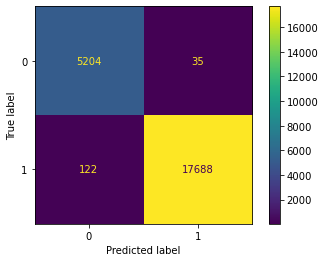

In [56]:
# plot confusion matrix
plot_confusion_matrix(XGB_model, X_val, y_val);


For XGB, out of 5239 for **Churn**, the model was able to accurately predict 5204(99%). The model missed 35(1%) churned customers, and predicted those as Non-churn. 

Our model was able to predict 17,688(99%) as Non-churn out of 17,810 and misclassified 122(1%) as being churn. 


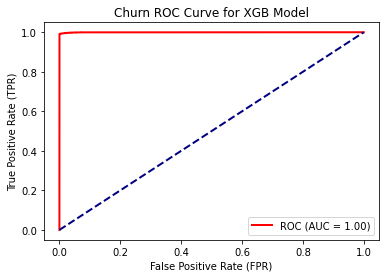

In [57]:
# predicting probabilities of data points being in the positive class
y_val_proba = XGB_model.predict_proba(X_val)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model')
plt.legend(loc='best')
plt.show()


AUC score is 100%

### Ensemble Models summary

We have our model evaluation results from both Random Forest and XGBoost. Below is a summary table of our result.


Model | True Churn | False Churn| Precision |    Recall       |f1-score
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 5170 (98%)| 69 (2%)|97% | 99% | 98%
Decision Tree | 5144 (97%) | 95 (3%) |98% | 98% | 98%
KNN | 4555 (86%) | 684 (14%) |89% | 87% | 88%
**Random Forest**| **5218 (99%)**| **21 (1%)**|**97%** | **100%**| **98%**
**XGBoost** | **5204 (99%)** | **35 (1%)** |**98%** | **99%** | **99%**


Random forest and XGBoost model perform better than the other base models seen earlier. Random Forest have a recall of 100% and 98% f1-score while XGBoost have a recall of 99% and 99% f1-score.

In general, our models are very good with precision, recall and f1-scores. We will also be comparing the ability of a model to **correctly predict churn class - 0** as our metrics. Random Forest misclassified churn the lowest, 21 churn were misclassified as not-churn. XGBoost also misclassified ony 35 as not-churn. Hence, both are our bset models so far.

### Downsampling 

Because of imbalance data, can we try and downsample or upsample to get a balanced data? Next, we will try both and fit our model on XGBoost, since we are sure it is one of our good model so far and a faster model to run.

For downsampling, we will resample the majority class (1) to have a smaller number of observations to balance out the classes instead of increasing the minority class (0). 

In [58]:
# import resampled
from sklearn.utils import resample

# downsample
print("Number of Class 1 examples before:", X2_train[y2_train==1].shape[0])



# resample the data  - reduce class 1 to match 0
X_downsampled, y_downsampled = resample(X2_train[y2_train==1],
                                        y2_train[y2_train==1],
                                        replace=True,
                                        n_samples=X2_train[y2_train==0].shape[0],
                                        random_state=234)

# print out new distribution
print("Number of Class 1 examples after:", X_downsampled.shape[0])

# Combine downsample with original data
X_train_down = np.vstack((X2_train[y2_train == 0], X_downsampled))
y_train_down = np.hstack((y2_train[y2_train == 0], y_downsampled))

Number of Class 1 examples before: 41556
Number of Class 1 examples after: 12223


In [59]:
# check downsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_train_down).value_counts().sort_index())


Original class distribution


0    12223
1    41556
Name: churn, dtype: int64


Resampled class distribution (Downsampled)


0    12223
1    12223
dtype: int64

RF Confusion matrices: 



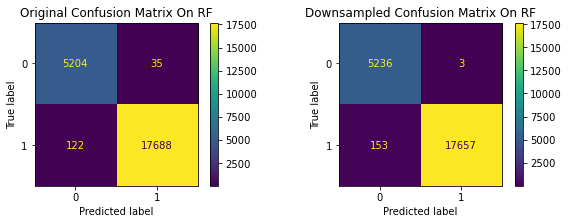


Original data classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049


Downsampled data classification report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      1.00      0.99     23049
weighted avg       0.99      0.99      0.99     23049



In [60]:
#####################
### MODEL FITTING ###
#####################


# on the original data
churn_XGB_model = XGBClassifier().fit(X2_train, y2_train)

# evaluate on the original val set
y_pred = churn_XGB_model.predict(X_val.values)

# classification report
report_initial = classification_report(y_val, y_pred)

# on the downsampled data
churn_XGB_model_down = XGBClassifier().fit(X_train_down, y_train_down)

# evaluate on the original val set - NO SAMPLING
y_pred_2 = churn_XGB_model_down.predict(X_val) 

# classification report
report_downsampled = classification_report(y_val, y_pred_2)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("RF Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(churn_XGB_model, X_val, y_val, ax=axes[0])
axes[0].set_title('Original Confusion Matrix On RF')

# Model on the upsampled data
plot_confusion_matrix(churn_XGB_model_down, X_val, y_val, ax=axes[1])
axes[1].set_title('Downsampled Confusion Matrix On RF')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\nDownsampled data classification report:", print_line, report_downsampled)

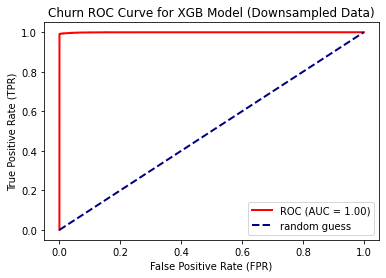

In [61]:
# predicting probabilities of data points being in the positive class
y_val_proba = churn_XGB_model_down.predict_proba(X_val.values)[:,1] 
# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model (Downsampled Data)')
plt.legend(loc='best')
plt.show()

We compare the original result (without downsampling) with result from downsampling. The result after downsampling is great! It was able to misclassfify only 3 with a recall of 100%! As opposed to without sampling that misclssified 35. 

AUC score is 100% as usual.

This is the best model so far! 

Let us try to upsample and compare the results.

### Upsampling

Similar to downsampling, upsampling entails resampling the observations that belong to the underrepresented class so that our training data consists of equal proportions of each class. 

In [62]:
# upsample 
from sklearn.utils import resample

# print the original class 0 distribution
print('Number of Class 0 examples before:', X2_train[y2_train==0].shape[0])


# resample the data to upsample the class 0 distribution
X_upsampled, y_upsampled = resample(X2_train[y2_train==0],
                                    y2_train[y2_train==0],
                                    replace=True,
                                    n_samples=X2_train[y2_train==1].shape[0],
                                    random_state=234)

# print out the new class 0 distribution
print('Number of Class 0 examples after:', X_upsampled.shape[0])

# combine the upsampled data with the original data
X_train_up = np.vstack((X2_train[y2_train==1], X_upsampled))
y_train_up = np.hstack((y2_train[y2_train==1], y_upsampled))


Number of Class 0 examples before: 12223
Number of Class 0 examples after: 41556


In [63]:
# check downsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (UPsampled)')
display(pd.Series(y_train_up).value_counts().sort_index())



Original class distribution


0    12223
1    41556
Name: churn, dtype: int64


Resampled class distribution (UPsampled)


0    41556
1    41556
dtype: int64

Confusion matrices: 



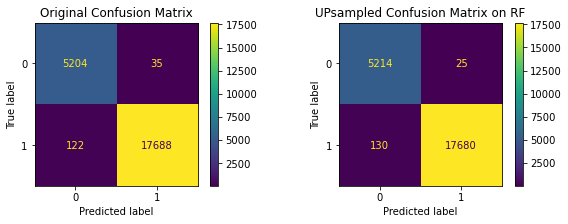


Original data classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      0.99      0.99     23049
weighted avg       0.99      0.99      0.99     23049



In [64]:
#####################
### MODEL FITTING ###
#####################


# on the original data
churn_XGB_model = XGBClassifier().fit(X2_train, y2_train)


# evaluate on the original val set
y_pred = churn_XGB_model.predict(X_val.values)

# classification report
report_initial = classification_report(y_val, y_pred)

# on the upsampled data
churn_XGB_model_up = XGBClassifier().fit(X_train_up, y_train_up)

# evaluate on the original val set - NO SAMPLING
y_pred_2 = churn_XGB_model_up.predict(X_val) 

# classification report
report_upsampled = classification_report(y_val, y_pred_2)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(churn_XGB_model, X_val, y_val, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(churn_XGB_model_up, X_val, y_val, ax=axes[1])
axes[1].set_title('UPsampled Confusion Matrix on RF')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

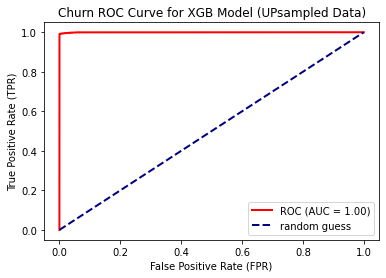

In [65]:
# probabilistic prediction
y_val_proba = churn_XGB_model_up.predict_proba(X_val.values)[:,1] 
# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model (UPsampled Data)')
plt.legend(loc='best')
plt.show()
    

The downsampled model did a better job at classifying churn than the upsampled model. 

The upsampled model was able to misclassify 25 churn, still better than the original (misclassified 35) like the downsampled model, the upsampled model had a f1-score of 99% and a recall of 100%.

Let us have a look at our results so far.


Model | True Churn | False Churn| Precision |    Recall       |f1-score
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 5170 | 69 |97% | 99% | 98%
Decision Tree | 5144 | 95  |98% | 98% | 98%
KNN | 4555 | 684  |89% | 87% | 88%
Random Forest| 5218 | 21 |97% | 100%| 98%
XGBoost | 5204  | 35  |98%| 99% | 99%
**Down sampled**| **5236**| **3**|**97%** | **100%**| **98%**
**Up sampled** | **5214** | **25** |**98%** | **100%** | **99%**

Downsampled model is really good, its the best. 

### Hyperparameters with Grid Search

So far, we have good result but can we make it better? Our next approach is to optimise hyperparameters instead of guessing or using the default parameters. We will do this with `parameter grid search`.

We will build a pipeline that consists of any number of transformers, models and an estimator. 

As seen earlier our best performing models are (without sampling):

1. **Random Forest**
2. **XGBoost**
3. **Logistic Regression** 

These are the models we will pass into our parameter grid and futher search for parameters that will give us more robust model.

We will set up a pipeline and create a placeholder and will be changed when we pass the pipeline into the grid search later.

In [66]:
# Set up a pipeline and placeholder
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), 
                        ('model', LogisticRegression())])

Now let us set our parameter grid

In [67]:
# set different range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

n_estimators = [100, 200, 400, 600, 800]

max_depth=[2, 8, 16]

# Parameter grid
param_grid = [
    
    # logreg with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(solver='lbfgs', random_state=234, n_jobs=-1)],
     'model__C': c_values},
    
    # XGB
    {'scaler': [None],
     'model__eta': [0.1, 0.3],
     'model__gamma': [0, 2],
     'model__max_depth': np.arange(1, 10),
     'model__min_child_weight': [1, 3],
     'model': [XGBClassifier(random_state=234)]},
    
    # Random Forest
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     "model__max_features": [1, 3, 10],
     "model__min_samples_split": [1, 3, 10],
     "model__min_samples_leaf": [1, 3, 10],
     "model__criterion": ["gini", "entropy"],
     'model': [RandomForestClassifier(max_depth = max_depth, n_estimators=n_estimators, random_state=234)]}
    
]

In [68]:
grid_s  = GridSearchCV(my_pipeline, param_grid=param_grid, n_jobs=-1, verbose=1, cv=5)

fitted_grid_s= grid_s.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [69]:
# The best hyperparameters
fitted_grid_s.best_params_

{'dim_reducer': PCA(n_components=0.95),
 'dim_reducer__n_components': 0.95,
 'model': LogisticRegression(C=100, n_jobs=-1, random_state=234),
 'model__C': 100,
 'scaler': MinMaxScaler()}

The best parameters are using `PCA` at 95% variance, `MinMaxScaler`, `C_values-100`. Let us utilise these parameters and check the result.

In [70]:
# Set MinMaxscaler for the data
# instantiate scaler
scaler = MinMaxScaler()

X_train_down_ss = scaler.fit_transform(X_train_down)
X_val_ss = scaler.transform(X_val)


In [71]:
# Apply to PCA

# Instantiate
logreg_PCA = PCA(n_components=0.85)

# Fit (train)
logreg_PCA.fit(X_train_down_ss)

# Transform (train & test)
X_train_down_PCA = logreg_PCA.transform(X_train_down_ss)
X_val_PCA = logreg_PCA.transform(X_val_ss)

In [72]:
# fit on PCA
best_params = LogisticRegression(C=100, n_jobs=-1, random_state=234)
best_params.fit(X_train_down_PCA, y_train_down)

# print out the scores
print(f"Train accuracy: {best_params.score(X_train_down_PCA, y_train_down)}")
print(f"Validation accuracy: {best_params.score(X_val_PCA, y_val)}")

Train accuracy: 0.9914096375685184
Validation accuracy: 0.9873313375851447


In [73]:
# display the classification report
y_pred = best_params.predict(X_val_PCA)

report_best_params = classification_report(y_val, y_pred)
print(report_best_params)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5239
           1       1.00      0.99      0.99     17810

    accuracy                           0.99     23049
   macro avg       0.98      0.99      0.98     23049
weighted avg       0.99      0.99      0.99     23049



In [74]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5205,34
True Non-churn,258,17552


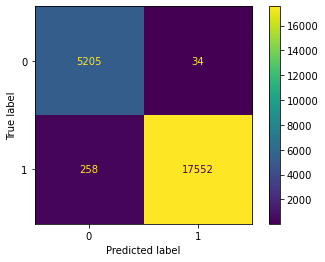

In [75]:
# plot matrix
plot_confusion_matrix(best_params, X_val_PCA, y_val);


The grid search performance is lower (misclassified 34) than downsampled using XGB (misclassified 3). Since we already have best performance with XGB downsampled, we will use XGB to search for the best parameters. 

Let us define our estimators for pipeline.

In [76]:
# define the estimators for our pipeline
estimators = [('scaler', None),
              ("model", XGBClassifier())]

pipe = Pipeline(estimators)


Next, we will define different parameters in other to be able to choose the best for our model.

In [77]:
# define the parameters grid 

param_grid = [
    {'scaler': [None],
     'model__eta': [0.1, 0.3],
     'model__gamma': [0, 2],
     'model__max_depth': np.arange(1, 10),
     'model__min_child_weight': [1, 3],
     'model': [XGBClassifier()]}     
]

grid = GridSearchCV(pipe, param_grid, cv=5)

# fit on downsample
fitted_grid = grid.fit(X_train_down, y_train_down)


In [78]:
# The best hyperparameters
fitted_grid.best_params_


{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eta=0.3, eval_metric=None,
               feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, ...),
 'model__eta': 0.3,
 'model__gamma': 0,
 'model__max_depth': 8,
 'model__min_child_weight': 1,
 'scaler': None}

We have our best parameters now, let us fit on validation set and print out the scores.

In [79]:
# fit the model with the best parameters 
XGB_model_best_params = XGBClassifier(eta=0.3, gamma=0, 
                                      max_depth=8, min_child_weight=1, random_state=234).fit(X_train_down, y_train_down)

# print out the scores
print(f"Train accuracy: {XGB_model_best_params.score(X_train_down, y_train_down)}")
print(f"Validation accuracy: {XGB_model_best_params.score(X_val.values, y_val)}")



[00:33:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.

Train accuracy: 1.0
Validation accuracy: 0.9931016530001302


In [82]:
# display the classification report
y_pred = XGB_model_best_params.predict(X_val.values)

report_XGB = classification_report(y_val, y_pred)
print(report_XGB)



              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5239
           1       1.00      0.99      1.00     17810

    accuracy                           0.99     23049
   macro avg       0.99      1.00      0.99     23049
weighted avg       0.99      0.99      0.99     23049



In [83]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17810
0     5239
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,5235,4
True Non-churn,155,17655


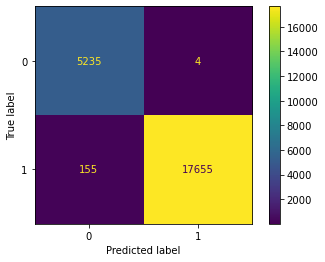

In [84]:
# plot confusion matrix
plot_confusion_matrix(XGB_model_best_params, X_val.values, y_val);

Model | True Churn | False Churn| Precision |    Recall       |f1-score
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 5170 | 69 |97% | 99% | 98%
Decision Tree | 5144 | 95  |98% | 98% | 98%
KNN | 4555 | 684  |89% | 87% | 88%
Random Forest| 5218 | 21 |97% | 100%| 98%
XGBoost | 5204  | 35  |98%| 99% | 99%
Downsampled| 5236| 3|97% | 100%| 98%
Upsampled | 5214 | 25 |98% | 100% | 99%
**XGB_LR_RF-Grid Search**| **5205**| **34**|**95%** | **99%**| **97%**
**XGB-Grid Search** | **5253** | **4** |**97%** | **100%** | **99%**

If our goal is to identify as many of **true churn** as possible, and measure how well we achieved that goal. 

From the table displayed above, we have our best model with **Downsampled** with XGB. It misclassified only 3 at a recall of 100%, precision of 97% and f1-score of 98%.
 
Now that we are statisfied with our model, let us score on our test set. We will use the **downsampled** variables with XGBoost.

### Final Model - Scoring on Test Set

Our best model involve downsampling our class (independent variable) and runing XGB model using the following parameters:

* eta = 0
* gamma = 0
* max depth = 8
* min child weight = 1
* random_state=234

To begin with, we will use the downsampled X_train data, fit the model on XGB and score on test set

In [85]:
# check the downsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_train_down).value_counts().sort_index())


Original class distribution


0    12223
1    41556
Name: churn, dtype: int64


Resampled class distribution (Downsampled)


0    12223
1    12223
dtype: int64

In [86]:
# fit the data 
XGB_model_down_sample = XGBClassifier().fit(X_train_down, y_train_down)

# print accuracy results 
print(f"Train Accuracy: {XGB_model_down_sample.score(X_train_down, y_train_down)}")
print(f"Validation Accuracy: {XGB_model_down_sample.score(X_val.values, y_val)}")
print(f"Test Accuracy: {XGB_model_down_sample.score(X_test.values, y_test)}")

Train Accuracy: 1.0
Validation Accuracy: 0.9932318104906938
Test Accuracy: 0.9931275055969178


In [87]:
# generate report for downsampling

y_pred_down_sample = XGB_model_down_sample.predict(X_test.values)

report_downsampled = classification_report(y_test, y_pred_down_sample)
print(report_downsampled)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4365
           1       1.00      0.99      1.00     14842

    accuracy                           0.99     19207
   macro avg       0.99      1.00      0.99     19207
weighted avg       0.99      0.99      0.99     19207



In [88]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_test.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_down_sample),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    14842
0     4365
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4364,1
True Non-churn,131,14711


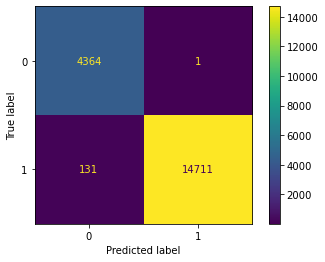

In [89]:
# plot confusion matrix
plot_confusion_matrix(XGB_model_down_sample, X_test.values, y_test);

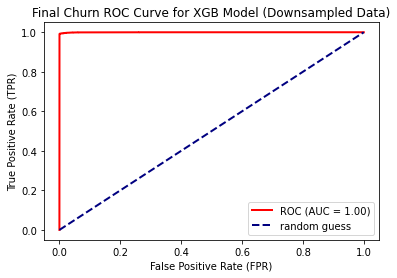

In [90]:
# probabilistic prediction
y_test_proba = churn_XGB_model_up.predict_proba(X_test.values)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Final Churn ROC Curve for XGB Model (Downsampled Data)')
plt.legend(loc='best')
plt.show()
    


Model | True Churn | False Churn| Precision |    Recall       |f1-score
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 5170 | 69 |97% | 99% | 98%
Decision Tree | 5144 | 95  |98% | 98% | 98%
KNN | 4555 | 684  |89% | 87% | 88%
Random Forest| 5218 | 21 |97% | 100%| 98%
XGBoost | 5204  | 35  |98%| 99% | 99%
Downsampled| 5236| 3|97% | 100%| 98%
Upsampled | 5214 | 25 |98% | 100% | 99%
XGB_LR_RF-Grid Search| 5205| 34|95% | 99%| 97%
XGB-Grid Search | 5253 | 4 |97% | 100% | 99%
<font color=red> test_set_downsampled_XGB</font>|<font color=red>4364</font>|<font color=red>1</font>|<font color=red>97%</font>|<font color=red>100%</font>|<font color=red>99%</font>

Our test result is almost perfect! The model made predictions for the train and the test set: there is only 1 churn that is misclassified as not-churn. Hence, we can be pretty confidence we will be able to detect customers that are at the risk of churn and target them for marketing and retention. 

### Conclusion

In this notebook, we conducted modeling on our dataset to determine which model is the best performing using validation set with regards to correctly classifying churn class as truly churn with a good precision.

We concluded that downsampled with XGB was the best and we went ahead to score and evaluate on our test set. 
The model performed very well on test set, misclassifying only 1 as not-churn. 

We can use the model in this notebook and apply to determine customers that are at the risk of churn. This is not limited to eccommerce industry, may be applied to any industry that depends on customer for revenue and growth. 

Next steps:

We may want to explore the review comments of likely churn customers to have an idea if delivery, product prices or freight price is/are likely predictors of churn.